In [15]:
import numpy as np
import pandas as pd
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import pickle
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import functools
import csv
from sklearn.preprocessing import StandardScaler

#Read in the dataset
df = pd.read_csv('data1.csv')

In [16]:
#Preprocess the dataset using get_dummies
RoomName=pd.get_dummies(df['Room_Name'])
BuildingOccupancy=pd.get_dummies(df['Building_Occupancy'])
FireSprinkler=pd.get_dummies(df['Fire_Sprinkler'], drop_first=True)
SmokeDetector=pd.get_dummies(df['Smoke_Detector'], drop_first=True)
df=pd.concat([RoomName,BuildingOccupancy,FireSprinkler,df['Room_Area'],SmokeDetector],axis=1)
Y=df[1]
X=df.drop(1,axis=1)

In [17]:
#Preprocess the dataset using Standard Scaler
scaler=StandardScaler()
scaler.fit(df.drop(1,axis=1))
scaled_features=scaler.transform(df.drop(1, axis=1))
scaled_features
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df=df_feat

In [20]:
#Split the dataset to test and train data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=15)

In [21]:
#Fit the training data to the Bernoulli Naive Bayes with binarize = True algorithm and produce classification prediction of the test data
BernNB=BernoulliNB(binarize=True)
BernNB.fit(X_train,Y_train)
print(BernNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


In [22]:
#Confusion matrix and Classification report of the Bernoulli Naive Bayes with binarize = True
y_expect =Y_test
y_pred=BernNB.predict(X_test)
print (accuracy_score(y_expect,y_pred))

print(classification_report(y_expect,y_pred))

0.43434343434343436
             precision    recall  f1-score   support

          0       0.43      1.00      0.61        43
          1       0.00      0.00      0.00        56

avg / total       0.19      0.43      0.26        99



/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
#Fit the training data to the Multinomial Naive Bayes algorithm and produce classification prediction of the test data
MultiNB=MultinomialNB()

MultiNB.fit(X_train, Y_train)

y_pred=MultiNB.predict(X_test)

#Confusion matrix and Classification report of the Multinomial Naive Bayes
print accuracy_score(y_expect,y_pred)

print(classification_report(y_expect,y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.8383838383838383
             precision    recall  f1-score   support

          0       0.85      0.77      0.80        43
          1       0.83      0.89      0.86        56

avg / total       0.84      0.84      0.84        99



In [24]:
#Fit the training data to the Guassian Naive Bayes algorithm and produce classification prediction of the test data
GuasNB=GaussianNB()
GuasNB.fit(X_train,Y_train)

y_pred=GuasNB.predict(X_test)

#Confusion matrix and Classification report of the Guassian Naive Bayes
print accuracy_score(y_expect, y_pred)

print(classification_report(y_expect,y_pred))

GaussianNB(priors=None)
0.7272727272727273
             precision    recall  f1-score   support

          0       0.72      0.60      0.66        43
          1       0.73      0.82      0.77        56

avg / total       0.73      0.73      0.72        99



In [25]:
#Fit the training data to the Bernoulli Naive Bayes with binarize = False algorithm and produce classification prediction of the test data
BernNB=BernoulliNB(binarize=False)
BernNB.fit(X_train,Y_train)
print(BernNB)

#Confusion matrix and Classification report of the Bernoulli Naive Bayes with binarize = False
y_expect =Y_test
y_pred=BernNB.predict(X_test)
print (accuracy_score(y_expect,y_pred))
print(classification_report(y_expect,y_pred))

BernoulliNB(alpha=1.0, binarize=False, class_prior=None, fit_prior=True)
0.9393939393939394


In [27]:
#list of the scores that will appended from the for loop using the mean_max_min function below
precision_list=[]
recall_list=[]
f1_score_list=[]
support_list=[]

#function to append the scores to each list
def mean_max_min(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split('      ')
        precision_list.append(float(row_data[2]))
        recall_list.append(float(row_data[3]))
        f1_score_list.append(float(row_data[4]))
        support_list.append(float(row_data[5]))

#loop of random state integers from 1-150 
for i in range(1,150):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=i)
    BernNB=BernoulliNB(binarize=False)
    BernNB.fit(X_train,Y_train)
    pred_i=BernNB.predict(X_test)
    report = classification_report(Y_test,pred_i)
    mean_max_min(report)

In [28]:
#print out the scores min max and mean

print('minimum precision: ',min(precision_list))
print('maximum precision: ',max(precision_list))
print('mean precision',sum(precision_list)/len(precision_list))

print('minimum recall: ',min(recall_list))
print('maximum recall: ',max(recall_list))
print('mean recall',sum(recall_list)/len(recall_list))

print('minimum F1 Score: ',min(f1_score_list))
print('maximum F1 Score: ',max(f1_score_list))
print('mean F1 Score',sum(f1_score_list)/len(f1_score_list))

print('minimum support: ',min(support_list))
print('maximum support: ',max(support_list))
print('mean support',sum(support_list)/len(support_list))

('minimum precision: ', 0.78)
('maximum precision: ', 1.0)
('mean precision', 0.9250335570469788)
('minimum recall: ', 0.79)
('maximum recall: ', 1.0)
('mean recall', 0.9243288590604017)
('minimum F1 Score: ', 0.82)
('maximum F1 Score: ', 0.99)
('mean F1 Score', 0.9233221476510051)
('minimum support: ', 39.0)
('maximum support: ', 60.0)
('mean support', 49.5)


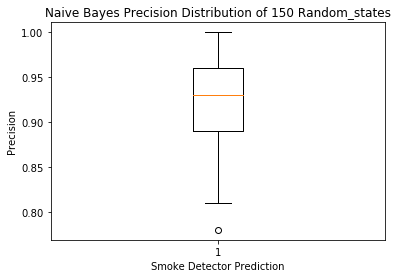

In [30]:
#visualize the precision distribution
plt.boxplot(precision_list)
plt.title('Naive Bayes Precision Distribution of 150 Random_states')
plt.xlabel('Smoke Detector Prediction')
plt.ylabel('Precision')
plt.show()